In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
city_data_df = pd.read_csv('Pyber/raw_data/city_data.csv')
ride_data_df = pd.read_csv('Pyber/raw_data/ride_data.csv')
drivers_per_city = (city_data_df.groupby('city'))['driver_count'].sum()
city_types = city_data_df['type'].unique()
ride_data_with_city_type = pd.merge(ride_data_df, city_data_df, on='city', how='left')
ride_data_with_city_type = ride_data_with_city_type.drop('driver_count', axis=1)

In [3]:
ride_data_with_city_type_rural = ride_data_with_city_type.loc[ride_data_with_city_type['type']=='Rural']
ride_data_with_city_type_suburban = ride_data_with_city_type.loc[ride_data_with_city_type['type']=='Suburban']
ride_data_with_city_type_urban = ride_data_with_city_type.loc[ride_data_with_city_type['type']=='Urban']
city_data_rural_df = city_data_df.loc[city_data_df['type']=='Rural']
city_data_suburban_df = city_data_df.loc[city_data_df['type']=='Suburban']
city_data_urban_df = city_data_df.loc[city_data_df['type']=='Urban']

In [4]:
average_fare_per_city_rural = (ride_data_with_city_type_rural.groupby('city'))['fare'].sum() / (ride_data_with_city_type_rural.groupby('city'))['fare'].count()
rides_per_city_rural = (ride_data_with_city_type_rural.groupby('city'))['ride_id'].count()

average_fare_per_city_suburban = (ride_data_with_city_type_suburban.groupby('city'))['fare'].sum() / (ride_data_with_city_type_suburban.groupby('city'))['fare'].count()
rides_per_city_suburban = (ride_data_with_city_type_suburban.groupby('city'))['ride_id'].count()

average_fare_per_city_urban = (ride_data_with_city_type_urban.groupby('city'))['fare'].sum() / (ride_data_with_city_type_urban.groupby('city'))['fare'].count()
rides_per_city_urban = (ride_data_with_city_type_urban.groupby('city'))['ride_id'].count()

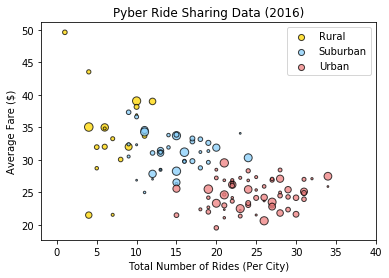

In [5]:
sizes = drivers_per_city
legend = ['Rural', 'Suburban', 'Urban']
plt.scatter(rides_per_city_rural, average_fare_per_city_rural, marker="o", 
            facecolors='gold', edgecolors="black",
            sizes=sizes, alpha=0.75)
plt.scatter(rides_per_city_suburban, average_fare_per_city_suburban, marker="o", 
            facecolors='lightskyblue', edgecolors="black",
            sizes=sizes, alpha=0.75)
plt.scatter(rides_per_city_urban, average_fare_per_city_urban, marker="o", 
            facecolors='lightcoral', edgecolors="black",
            sizes=sizes, alpha=0.75)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.xlim(-2, 40)
plt.legend(legend)
plt.show()


In [6]:
percentage_fare_by_city_type = ((ride_data_with_city_type.groupby('type'))['fare'].sum() / ride_data_with_city_type['fare'].sum()).sort_values(ascending=False)
percentage_ride_by_city_type = ((ride_data_with_city_type.groupby('type'))['ride_id'].count() / ride_data_with_city_type['ride_id'].count()).sort_values(ascending=False)
percentage_driver_by_city_type = ((city_data_df.groupby('type'))['driver_count'].sum() / city_data_df['driver_count'].sum()).sort_values(ascending=False)

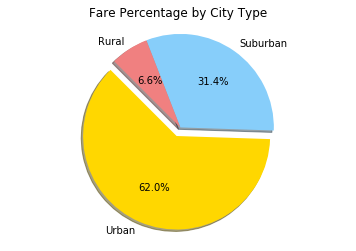

In [7]:
# pie chart: percentage_fare_by_city_type

labels = city_types
sizes = percentage_fare_by_city_type
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0.1, 0, 0]

plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=135)
plt.axis("equal")
plt.title("Fare Percentage by City Type")
plt.show()

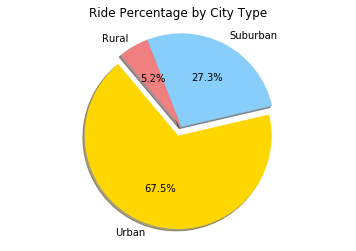

In [8]:
# pie chart: percentage_ride_by_city_type

labels = city_types
sizes = percentage_ride_by_city_type
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0.1, 0, 0]

plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=130)
plt.axis("equal")
plt.title("Ride Percentage by City Type")
plt.show()

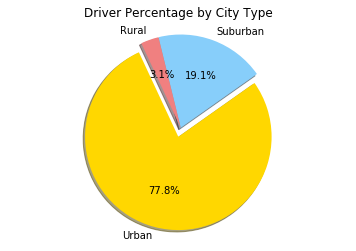

In [9]:
# pie chart: percentage_driver_by_city_type

labels = city_types
sizes = percentage_driver_by_city_type
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0.1, 0, 0]

plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=115)
plt.axis("equal")
plt.title("Driver Percentage by City Type")
plt.show()